# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data= pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [56]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data= combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]
duplicate_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data= combined_data.drop_duplicates(['Mouse ID'])
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [58]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data['Mouse ID'].unique())

249

## Summary Statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_groupby_mean = combined_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean']})
tumor_groupby_median = combined_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['median']})
tumor_groupby_std = combined_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['std']})
tumor_groupby_sem = combined_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['sem']})
tumor_groupby_var = combined_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['var']})

tumor_stats_df= pd.DataFrame({"Tumor Volume Mean": [tumor_groupby_mean],
                              "Tumor Volume Median":[tumor_groupby_median],
                              "Tumor Volume Std Dev": [tumor_groupby_std],
                               "Tumor Volume Std Error":[tumor_groupby_sem],
                                "Tumor Volume Variance": [tumor_groupby_var]})

tumor_stats_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Std Dev,Tumor Volume Std Error,Tumor Volume Variance
0,Tumor Volume (mm3) ...,Tumor Volume (mm3) ...,Tumor Volume (mm3) ...,Tumor Volume (mm3) ...,Tumor Volume (mm3) ...


In [116]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_groupby_mean_std =combined_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','std','sem','var','median']})
tumor_groupby_mean_std


Tumor Volume (mm3)                                          
                           mean       std       sem        var     median
Drug Regimen                                                             
Capomulin             40.675741  4.994774  0.329346  24.947764  41.557809
Ceftamin              52.591172  6.268188  0.469821  39.290177  51.776157
Infubinol             52.884795  6.567243  0.492236  43.128684  51.820584
Ketapril              55.235638  8.279709  0.603860  68.553577  53.698743
Naftisol              54.331565  8.134708  0.596466  66.173479  52.509285
Placebo               54.033581  7.821003  0.581331  61.168083  52.288934
Propriva              52.322552  6.507770  0.512884  42.351070  50.854632
Ramicane              40.216745  4.846308  0.320955  23.486704  40.673236
Stelasyn              54.233149  7.710419  0.573111  59.450562  52.431737
Zoniferol             53.236507  6.966589  0.516398  48.533355  51.818479

## Bar and Pie Charts

In [13]:
d_bar_data= combined_data.groupby(["Drug Regimen"])["Drug Regimen"].count()
d_bar_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

<Axes: xlabel='Drug Regimen'>

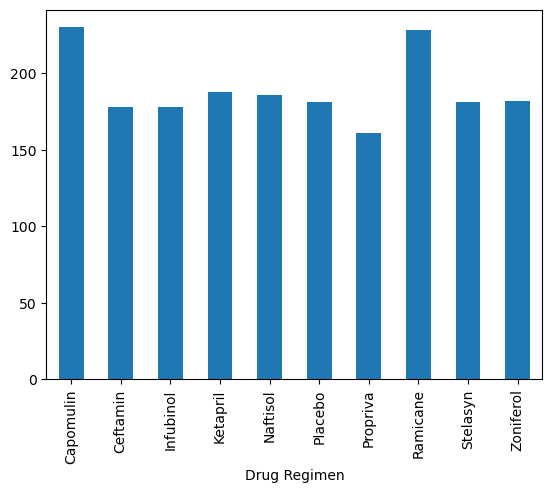

In [14]:
d_bar_data.plot(kind="bar")

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

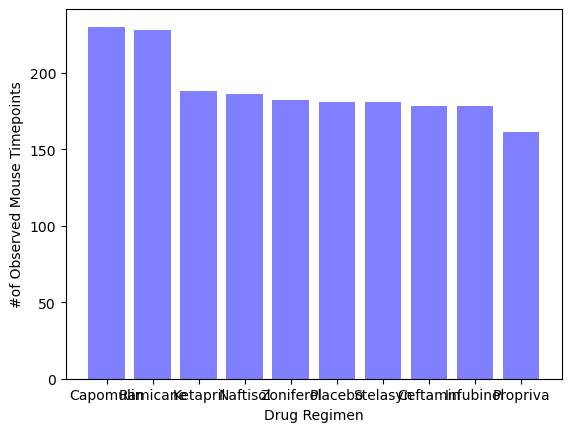

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
d_bar_data= combined_data.groupby(["Drug Regimen"])["Drug Regimen"].count().sort_values(ascending=False)
plt.bar(d_bar_data.index, d_bar_data, color='b', alpha=0.5, align="center",)
plt.xlabel("Drug Regimen")
plt.ylabel("#of Observed Mouse Timepoints")
plt.tight_layout

Sex
Male      958
Female    935
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Female vs Male')

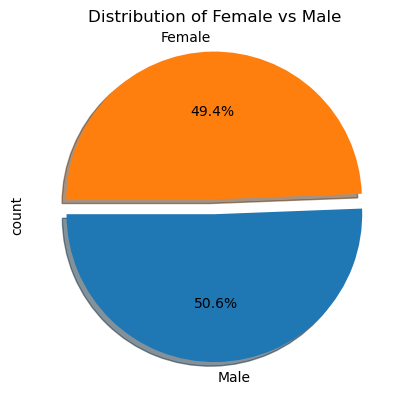

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_df= combined_data["Sex"].value_counts()
print(male_female_df)

male_female_df.plot(kind='pie',y='', autopct='%1.1f%%', startangle=180, shadow=True,explode=(0,0.1))
plt.title('Distribution of Female vs Male')

(-1.1020038288708183,
 1.1000953993420137,
 -1.104999085171598,
 1.2049808531307382)

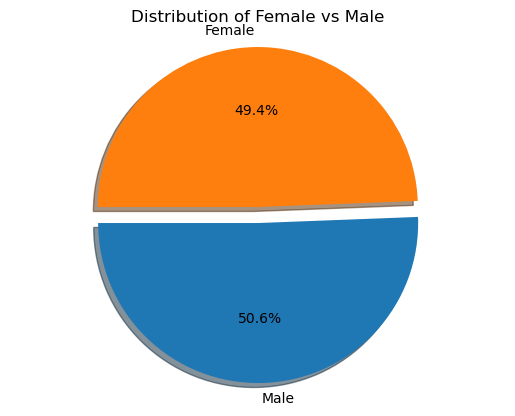

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male' , 'Female'
sizes = [958,935]
explode=(0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
plt.title('Distribution of Female vs Male')
ax1.axis('equal') 

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp_df =combined_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tp_df = greatest_tp_df.merge(combined_data,on=['Mouse ID','Timepoint'], how='left')
print(max_tp_df.head())

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


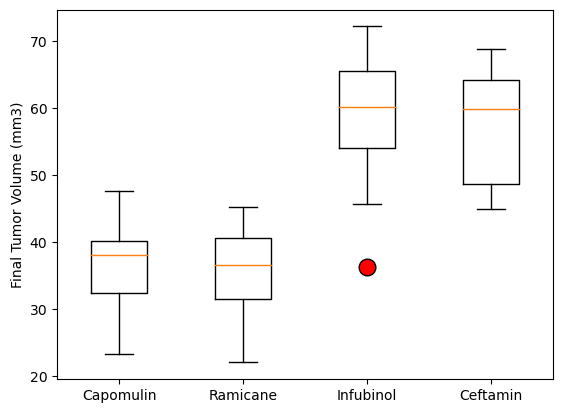

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

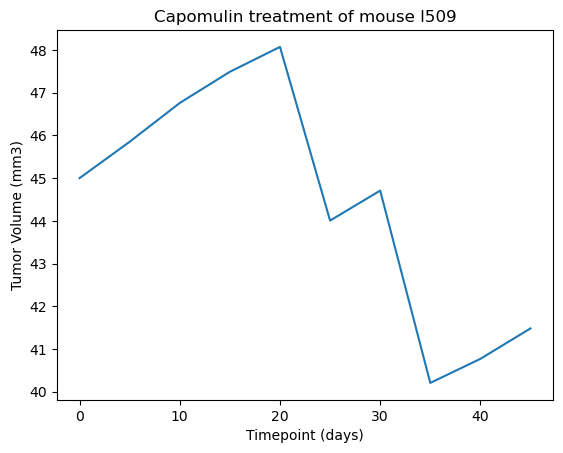

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


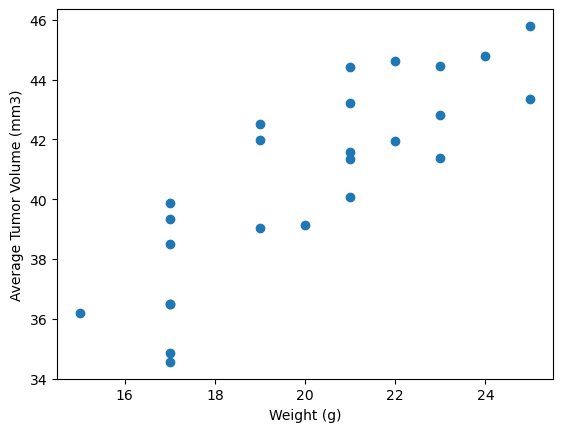

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


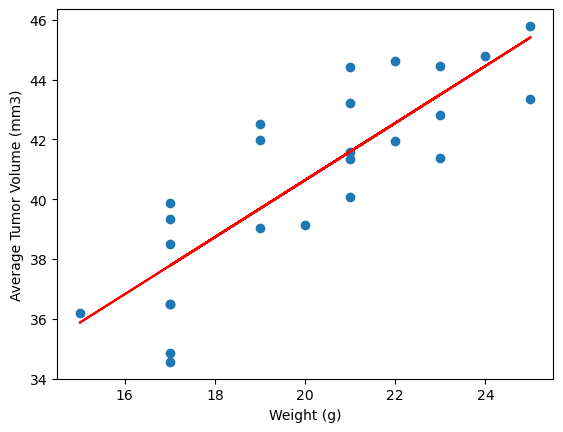

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
